# Linear Regression for Boston House Price Prediction

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
boston = load_boston()

In [2]:
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
# Loading data into pandas dataframe
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
bos['PRICE'] = boston.target
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [8]:
# Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [10]:
# Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [11]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
clf = SGDRegressor()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print("Coefficients: \n", clf.coef_)
print("Y_intercept", clf.intercept_)

Coefficients: 
 [-0.87124896  0.65471297 -0.44191942  0.88490447 -0.63460155  2.98328602
 -0.34713416 -2.15542918  0.85903213 -0.3325135  -1.75839589  1.06975581
 -3.63978981]
Y_intercept [22.26755422]


# Stochastic Gradient Decent(SGD) for Linear Regression

In [12]:
# Imported necessary libraries
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [13]:
# Data loaded 
bostan = load_boston()
# Convert it into pandas dataframe
data = pd.DataFrame(bostan.data, columns = bostan.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
# Summary
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [15]:
#standardize for fast convergence to minima
data = (data - data.mean())/data.std()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417300,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.414859,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.414861,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.414270,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.410003,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [16]:
# MEDV(median value is usually target), change it to price
data["PRICE"] = bostan.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.417300,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,24.0
1,-0.414859,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,21.6
2,-0.414861,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,34.7
3,-0.414270,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,33.4
4,-0.410003,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,36.2


In [17]:
# Target and features
Y = data["PRICE"]
X = data.drop("PRICE", axis = 1)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [19]:
x_train["PRICE"] = y_train
#x_test["PRICE"] = y_test

In [20]:
def cost_function(b, m, features, target):
    totalError = 0
    for i in range(0, len(features)):
        x = features
        y = target
        totalError += (y[:,i] - (np.dot(x[i] , m) + b)) ** 2
    return totalError / len(x)

In [21]:
# The total sum of squares (proportional to the variance of the data)i.e. ss_tot 
# The sum of squares of residuals, also called the residual sum of squares i.e. ss_res 
# the coefficient of determination i.e. r^2(r squared)
def r_sq_score(b, m, features, target):
    for i in range(0, len(features)):
        x = features
        y = target
        mean_y = np.mean(y)
        ss_tot = sum((y[:,i] - mean_y) ** 2)
        ss_res = sum(((y[:,i]) - (np.dot(x[i], m) + b)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
    return r2

In [22]:
def gradient_decent(w0, b0, train_data, x_test, y_test, learning_rate):
    n_iter = 1000
    partial_deriv_m = 0
    partial_deriv_b = 0
    cost_train = []
    cost_test = []
    for j in range(1, n_iter):
        
        # Train sample
        train_sample = train_data.sample(160)
        y = np.asmatrix(train_sample["PRICE"])
        x = np.asmatrix(train_sample.drop("PRICE", axis = 1))
        for i in range(len(x)):
            partial_deriv_m += np.dot(-2*x[i].T , (y[:,i] - np.dot(x[i] , w0) + b0))
            partial_deriv_b += -2*(y[:,i] - (np.dot(x[i] , w0) + b0))
        
        w1 = w0 - learning_rate * partial_deriv_m 
        b1 = b0 - learning_rate * partial_deriv_b
        
        if (w0==w1).all():
            #print("W0 are\n", w0)
            #print("\nW1 are\n", w1)
            #print("\n X are\n", x)
            #print("\n y are\n", y)
            break
        else:
            w0 = w1
            b0 = b1
            learning_rate = learning_rate/2
       
            
        error_train = cost_function(b0, w0, x, y)
        cost_train.append(error_train)
        error_test = cost_function(b0, w0, np.asmatrix(x_test), np.asmatrix(y_test))
        cost_test.append(error_test)
        
    #print("After {0} iteration error = {1}".format(j, error_train))
        #print("After {0} iteration error = {1}".format(j, error_test))
        
    return w0, b0, cost_train, cost_test

Coefficient: [[ 3.93816973e-01]
 [-1.97545126e-03]
 [-6.49377910e-01]
 [ 4.31315251e-01]
 [-1.51670156e+00]
 [ 3.91016564e+00]
 [ 3.47536552e-01]
 [-1.03333789e+00]
 [ 4.13280615e-01]
 [ 1.68738667e-01]
 [-2.54908057e+00]
 [ 3.92544621e-01]
 [-2.32710738e+00]] 
 y_intercept: [[21.28452626]]


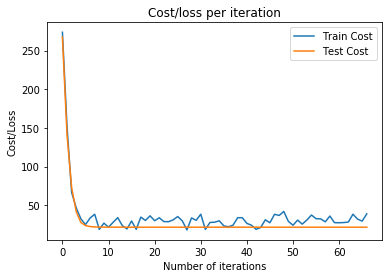

In [23]:
# Run our model
learning_rate = 0.001
w0_random = np.random.rand(13)
w0 = np.asmatrix(w0_random).T
b0 = np.random.rand()

optimal_w, optimal_b, cost_train, cost_test = gradient_decent(w0, b0, x_train, x_test, y_test, learning_rate)
print("Coefficient: {} \n y_intercept: {}".format(optimal_w, optimal_b))

# Plot train and test error in each iteration
plt.figure()
plt.plot(range(len(cost_train)), np.reshape(cost_train,[len(cost_train), 1]), label = "Train Cost")
plt.plot(range(len(cost_test)), np.reshape(cost_test, [len(cost_test), 1]), label = "Test Cost")
plt.title("Cost/loss per iteration")
plt.xlabel("Number of iterations")
plt.ylabel("Cost/Loss")
plt.legend()
plt.show()

# Comparison :-  sklearn SGD and  SGD implementation in python

In [24]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print("Variance score: %.2f" % r2_score(Y_test, Y_pred))

Mean squared error: 19.70
Variance score: 0.75


In [25]:
# Implemented SGD
# The mean squared error
error = cost_function(optimal_b, optimal_w, np.asmatrix(x_test), np.asmatrix(y_test))
print("Mean squared error: %.2f" % (error))
# Explained variance score : 1 is perfect prediction
r_squared = r_sq_score(optimal_b, optimal_w, np.asmatrix(x_test), np.asmatrix(y_test))
print("Variance score: %.2f" % r_squared)

Mean squared error: 21.69
Variance score: -0.84


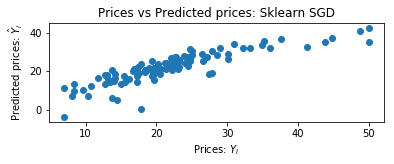

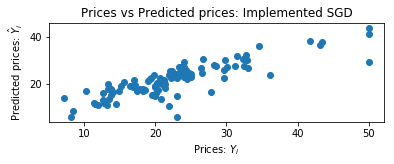

In [26]:
# Scatter plot of test vs predicted
# sklearn SGD
plt.figure(1)
plt.subplot(211)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Sklearn SGD")
plt.show()

# Implemented SGD
plt.subplot(212)
plt.scatter([y_test], [(np.dot(np.asmatrix(x_test), optimal_w) + optimal_b)])
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Implemented SGD")
plt.show()

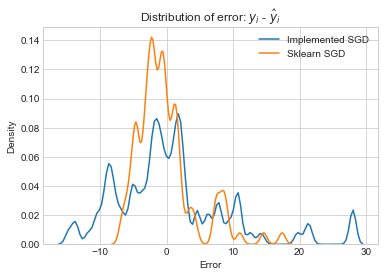

In [27]:
# Distribution of error
delta_y_im = np.asmatrix(y_test) - (np.dot(np.asmatrix(x_test), optimal_w) + optimal_b)
delta_y_sk = Y_test - Y_pred
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.asarray(delta_y_im)[0], label = "Implemented SGD", bw = 0.5)
sns.kdeplot(np.array(delta_y_sk), label = "Sklearn SGD", bw = 0.5)
plt.title("Distribution of error: $y_i$ - $\hat{y}_i$")
plt.xlabel("Error")
plt.ylabel("Density")
plt.legend()
plt.show()

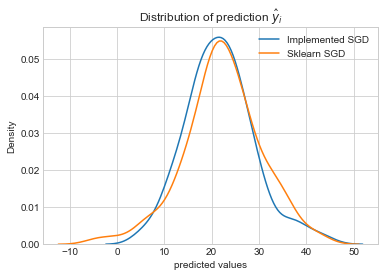

In [28]:
# Distribution of predicted value
sns.set_style('whitegrid')
sns.kdeplot(np.array(np.dot(np.asmatrix(x_test), optimal_w) + optimal_b).T[0], label = "Implemented SGD")
sns.kdeplot(Y_pred, label = "Sklearn SGD")
plt.title("Distribution of prediction $\hat{y}_i$")
plt.xlabel("predicted values")
plt.ylabel("Density")
plt.show()

## Conclusions

**1.	MSE should be zero  as this is our goal , but as observed the Regression output lines are not fitting  the data up to that extent. It is just fine.**

 
**2.	As Comparison between SKlearn SGD Linear Regression and SGD implemented in python are almost similar, but  SKlearn SGD Linear Regression performed slightly better.** 


**3.	Both the Models performed fine but they are not  the best models.**
